# Reproducing the plots in 2007.15001

To further showcase the capabilities of HDMSpectra, here we reproduce the relevant spectra from a number of plots in 2007.15001.

**NB:** `HDMSpectra` must to be installed before running these examples, otherwise the code below will fail at the point of loading `HDMSpectra`. Recall, the code can be installed by executing `python setup.py install` from the base directory. See the [README](https://github.com/nickrodd/HDMSpectra) for additional details.

These examples will run in both python2 and python3, however the presentation of the figures has been optimized for the latter. For example, in python2 the locations of the text labels will shift.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load HDMSpectra
from HDMSpectra import HDMSpectra

# Import numpy
import numpy as np

# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
cm = plt.get_cmap('jet')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['legend.frameon'] = False

## Establish data location

The spectra themselves are stored within the `HDMSpectra.hdf5` file provided with the code. By default this is in the `data` directory, although the file can be moved as long as `HDMSpectra` is provided the appropriate path.

In [2]:
data = '../data/HDMSpectra.hdf5' # location of hdf5 file

## Figure 1

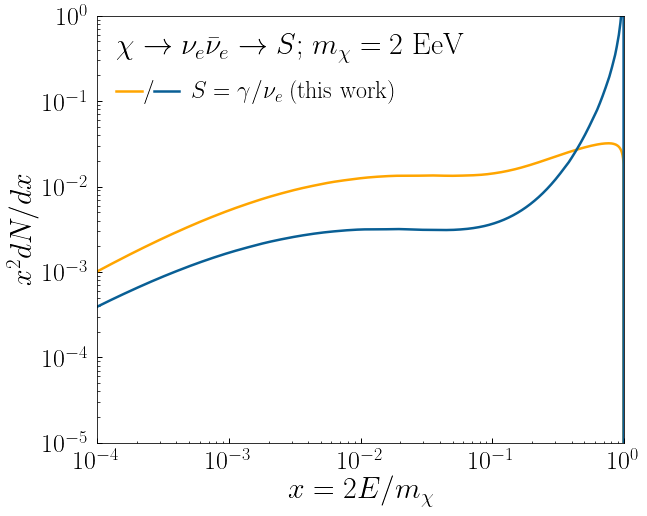

In [3]:
mDM = 2.e9 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue

low_id = 12 # low scale id, here nue
nue = HDMSpectra.spec(low_id, high_id, x, mDM, data)
low_id = 22 # low scale id, here photon
gam = HDMSpectra.spec(low_id, high_id, x, mDM, data)

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark (average over chirality)
low_id = 22 # pdg id of low scale state, here a photon

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam, 
         lw=2.5, c='orange')
plt.plot(x, x**2.*nue, 
         lw=2.5, c=(9./256.,95./256.,150./256.))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,1.e0])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.plot([1.4e-4,2.2e-4],[10**(-0.88),10**(-0.88)],lw=2.5,c='orange')
plt.text(2.25e-4,10**(-0.962),r'$/$',fontsize=24)
plt.plot([2.7e-4,10**(np.log10(2.7e-4)+0.19)],[10**(-0.88),10**(-0.88)], lw=2.5,
         c=(9./256.,95./256.,150./256.))
plt.text(1.4e-4,10**(-0.5),r'$\chi \to \nu_e \bar{\nu}_e \to S$; $m_{\chi} = 2$ EeV', fontsize=30)
plt.text(5.2e-4,10**(-1.),r'$S = \gamma / \nu_e$ (this work)', fontsize=24)

plt.tight_layout()
plt.show()

## Figure 3

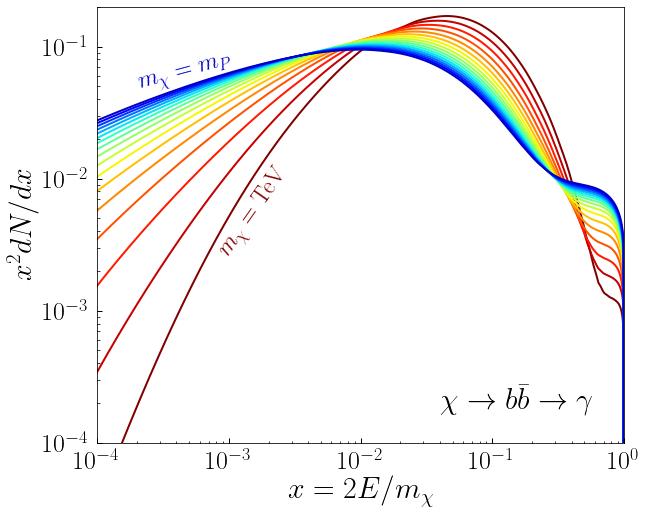

In [4]:
mDM = np.logspace(3.,19,17) # masses [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark
low_id = 22 # pdg id of low scale state, here a photon

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, m in enumerate(mDM):
    dNdx = HDMSpectra.spec(low_id, high_id, x, m, data)
    plt.plot(x, x**2.*dNdx, 
             lw=2., c=cm((len(mDM)-i)/float(len(mDM))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(4.e-2,10**(-3.75), r'$\chi \to b \bar{b} \to \gamma$', fontsize=30)
plt.text(2.e-4,10**(-1.35), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(mDM))),rotation=15)
plt.text(8.e-4,10**(-2.6), r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=55)

plt.tight_layout()
plt.savefig('./bbbar_allM.png',bbox_inches='tight')
plt.show()

## Figure S1

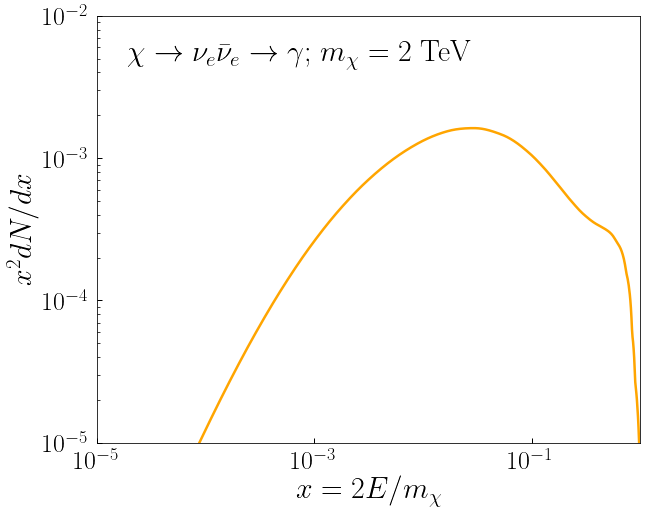

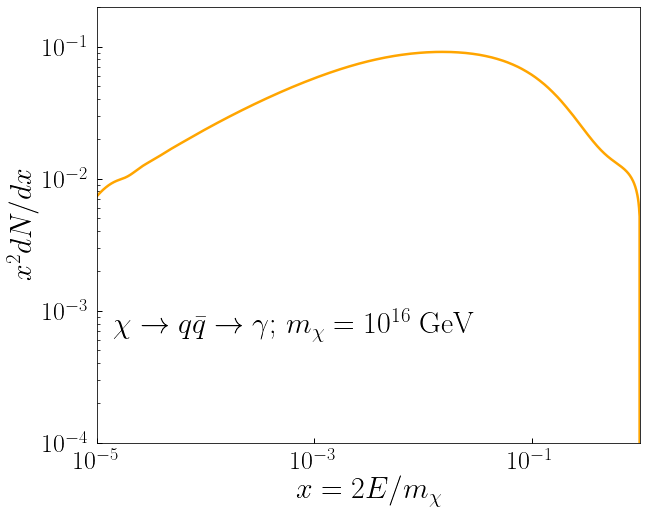

In [5]:
### Left
mDM = 2.e3 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue
low_id = 22 # low scale id, here photon

gam = HDMSpectra.spec(low_id, high_id, x, mDM, data)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam,
         lw=2.5, c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-5,1.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)
plt.text(1.9e-5,10**(-2.35),r'$\chi \to \nu_e \bar{\nu}_e \to \gamma$; $m_{\chi} =2$ TeV', fontsize=30)

plt.tight_layout()
plt.show()


### Right
mDM = 1.e16 # mass [GeV]
x = np.logspace(-5.,0.,1000) # energy fractions

low_id = 22 # pdg id of low scale state, here a photon

# q = (u+d+s)/3
gam = (HDMSpectra.spec(low_id, 1, x, mDM, data, data)
      +HDMSpectra.spec(low_id, 2, x, mDM, data, data)
      +HDMSpectra.spec(low_id, 3, x, mDM, data, data))/3.

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*gam,
         lw=2.5, c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.4e-5,10**(-3.2),r'$\chi \to q \bar{q} \to \gamma$; $m_{\chi} = 10^{16}$ GeV', fontsize=30)

plt.tight_layout()
plt.show()

## Figure S6

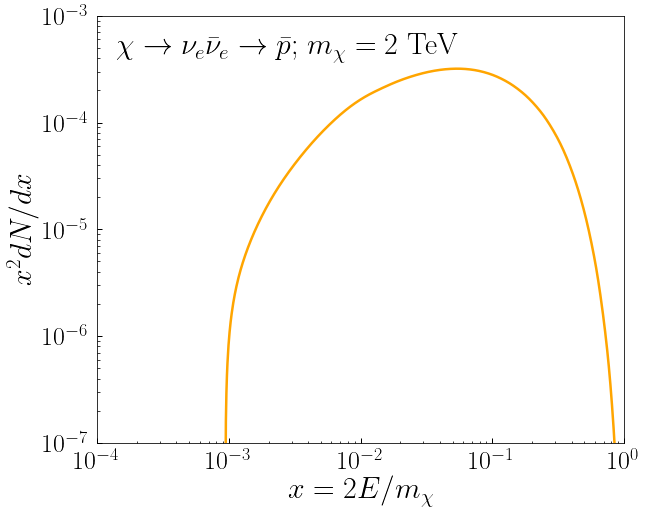

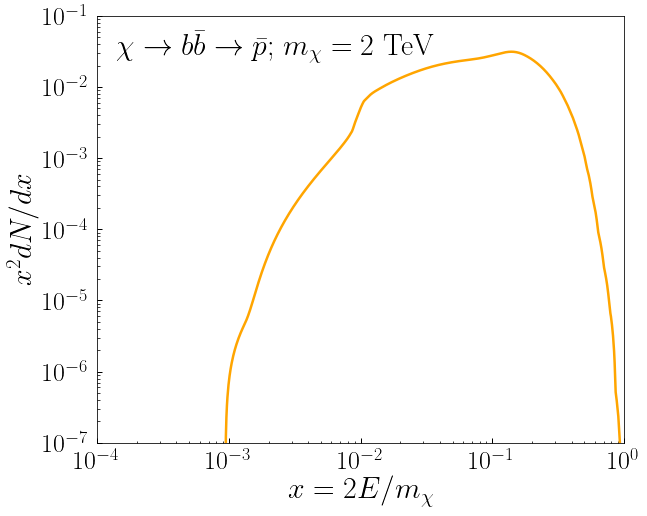

In [6]:
### Left
mDM = 2.e3 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 12 # pdg id of high scale state, indicating decay to nue and anti-nue

low_id = -2212 # low scale id, here anti-proton
ap = HDMSpectra.spec(low_id, high_id, x, mDM, data)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*ap, 
         lw=2.5, c='orange')

plt.text(1.4e-4,10**(-3.4), r'$\chi \to \nu_e \bar{\nu}_e \to \bar{p}$; $m_{\chi} = 2$ TeV', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-7,1.e-3])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()


### Right
mDM = 2.e3 # mass [GeV]
x = np.logspace(-4.,0.,1000) # energy fractions

high_id = 5 # pdg id of high scale state, indicating decay to a b and anti-b quark

low_id = -2212 # low scale id, here anti-proton
ap = HDMSpectra.spec(low_id, high_id, x, mDM, data)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(x, x**2.*ap, 
         lw=2.5, c='orange')

plt.text(1.4e-4,10**(-1.6), r'$\chi \to b \bar{b} \to \bar{p}$; $m_{\chi} = 2$ TeV', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-7,1.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.tight_layout()
plt.show()

# Figure S8

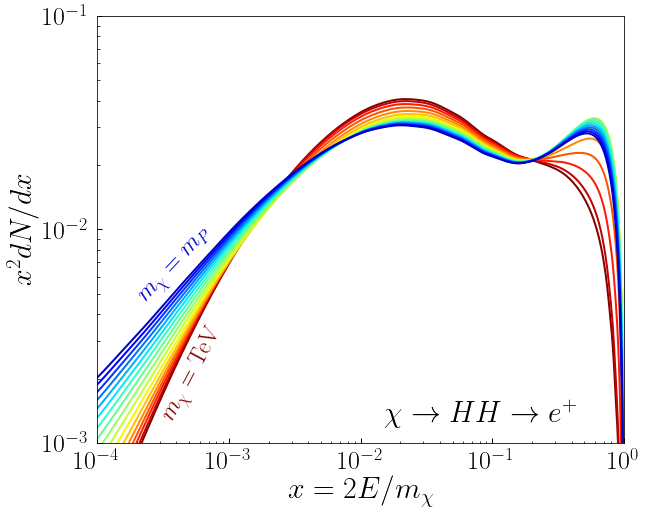

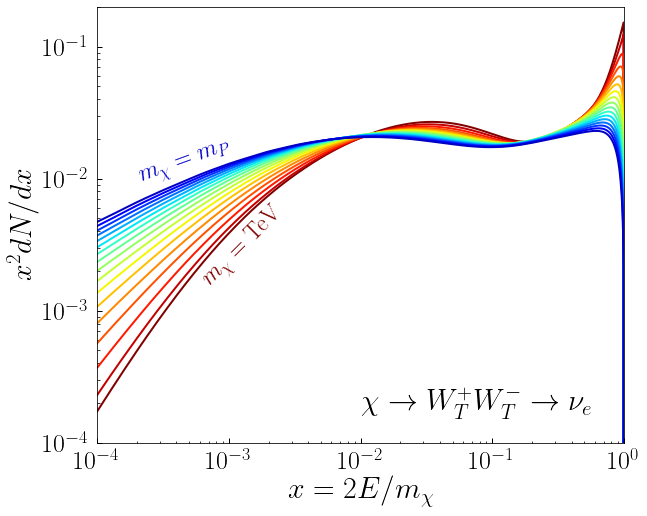

In [7]:
### Top Left
Qvals = np.logspace(3.,19,17)
xvals = np.logspace(-4.,0.,1000)

fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(11, 25, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-3,1.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$",fontsize=30)
plt.ylabel(r"$x^2 dN/dx$",fontsize=30)

plt.text(1.5e-2,10**(-2.9),r'$\chi \to H H \to e^+$', fontsize=30)
plt.text(2.e-4,10**(-2.35),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=47)
plt.text(3.e-4,10**(-2.9),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=62)

plt.tight_layout()
plt.show()


### Top Right
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = (HDMSpectra.spec(12, 1924, xvals, iQ, data)
           +HDMSpectra.spec(12, 2924, xvals, iQ, data))/2.
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.e-2, 10**(-3.82), r'$\chi \to W_T^+ W_T^- \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-2.05), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=20)
plt.text(6.e-4,10**(-2.83),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=45)

plt.tight_layout()
plt.show()

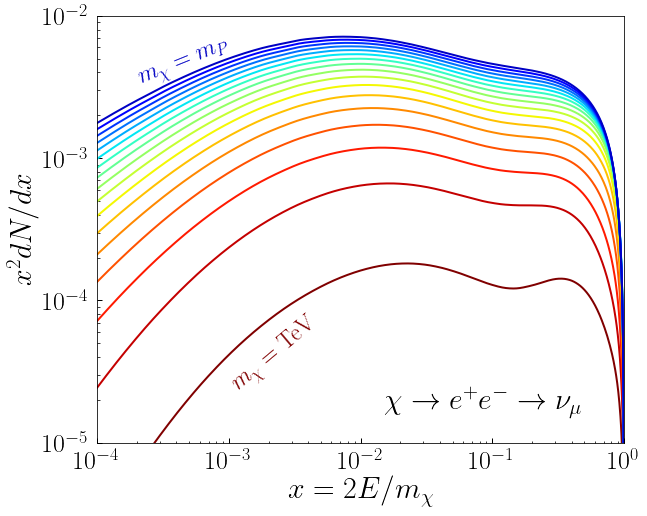

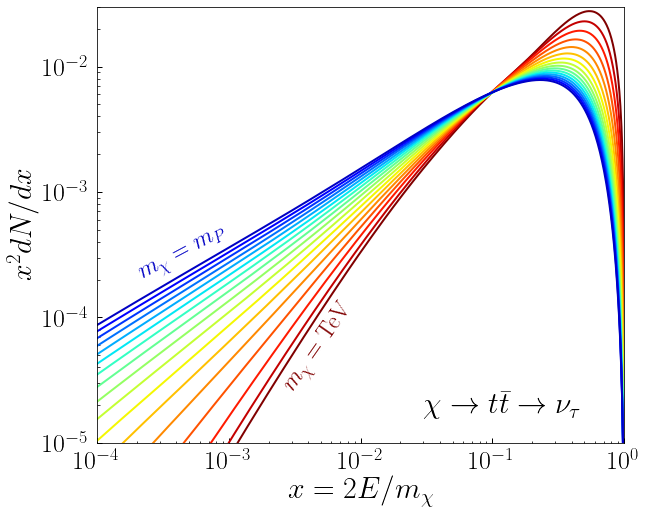

In [8]:
### Bottom Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(14, 11, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,1.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.5e-2,10**(-4.8),r'$\chi \to e^+ e^- \to \nu_{\mu}$', fontsize=30)
plt.text(2.e-4,10**(-2.5),r'$m_{\chi} =m_P$', fontsize=24, 
         color=cm(1./float(len(Qvals))), rotation=22)
plt.text(1.e-3,10**(-4.65),r'$m_{\chi} =$ TeV', fontsize=24, 
         color=cm(1.), rotation=40)

plt.tight_layout()
plt.show()


### Bottom Right
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(16, 6, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-5,3.e-2])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(3.e-2,10**(-4.8), r'$\chi \to t \bar{t} \to \nu_{\tau}$', fontsize=30)
plt.text(2.e-4,10**(-3.72), r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=28)
plt.text(2.5e-3,10**(-4.6), r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=55)

plt.tight_layout()
plt.show()

# Figure S9

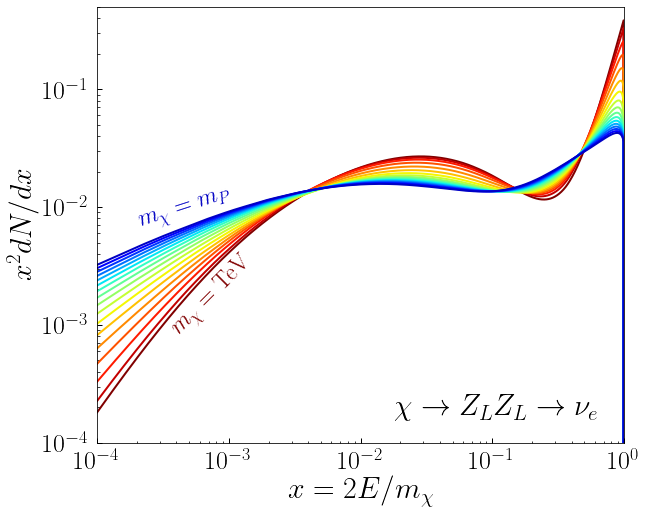

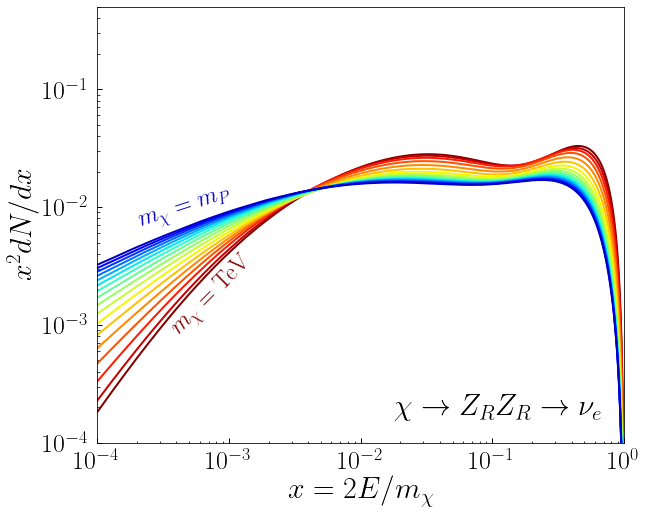

In [9]:
Qvals = np.logspace(3.,19,17)
xvals = np.logspace(-4.,0.,1000)

### Top Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 1923, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_L Z_L \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-2.2),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))), rotation=18)
plt.text(3.5e-4, 10**(-3.1),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.), rotation=45)

plt.tight_layout()
plt.show()


### Top Left
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 2923, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_R Z_R \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-2.2),r'$m_{\chi} =m_P$', fontsize=24, 
         color=cm(1./float(len(Qvals))),rotation=18)
plt.text(3.5e-4, 10**(-3.1),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=45)

plt.tight_layout()
plt.show()

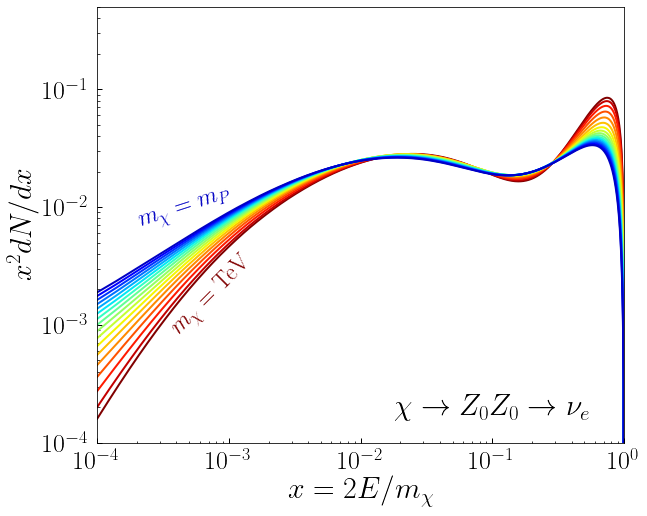

In [10]:
### Bottom
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

for i, iQ in enumerate(Qvals):
    dNdx = HDMSpectra.spec(12, 3923, xvals, iQ, data)
    plt.plot(xvals, xvals**2.*dNdx, 
             lw=2., c=cm((len(Qvals)-i)/float(len(Qvals))))

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
plt.ylim([1.e-4,5.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=30)
plt.ylabel(r"$x^2 dN/dx$", fontsize=30)

plt.text(1.8e-2, 10**(-3.8),r'$\chi \to Z_0 Z_0 \to \nu_e$', fontsize=30)
plt.text(2.e-4, 10**(-2.2),r'$m_{\chi} =m_P$', fontsize=24,
         color=cm(1./float(len(Qvals))),rotation=18)
plt.text(3.5e-4, 10**(-3.1),r'$m_{\chi} =$ TeV', fontsize=24,
         color=cm(1.),rotation=45)

plt.tight_layout()
plt.show()

# Figure S10

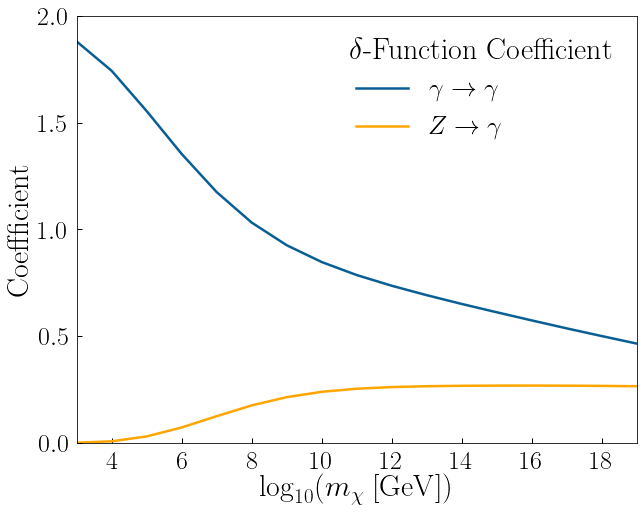

In [11]:
Qvals = np.logspace(3.,19,17)

# Just use a single x value, aim is the delta function
x = np.array([0.5])

delta1 = np.zeros_like(Qvals)
delta2 = np.zeros_like(Qvals)
for i, iQ in enumerate(Qvals):
    # Delta function coefficient stored as the last value
    delta1[i] = HDMSpectra.spec(22, 22, x, iQ, data, delta=True)[-1]
    delta2[i] = HDMSpectra.spec(22, 23, x, iQ, data, delta=True)[-1]
    
fig, ax = plt.subplots(1, figsize=(10/1.1, 8/1.1))

plt.plot(np.log10(Qvals), delta1, 
         lw=2.5,c=(9./256.,95./256.,150./256.), label=r'$\gamma \to \gamma$')
plt.plot(np.log10(Qvals), delta2, 
         lw=2.5,color='orange', label=r'$Z \to \gamma$')

plt.ylim([0.,2])
plt.xlim([3.,19.])
plt.xticks(np.arange(4., 20., 2.))
plt.yticks(np.arange(0., 2.5, 0.5))
plt.xlabel(r"$\log_{10}(m_{\chi}~[{\rm GeV}])$",fontsize=30)
plt.ylabel(r"Coeffficient", fontsize=30)

plt.text(10.8,1.8,r'$\delta$-Function Coefficient', fontsize=30)
plt.legend(bbox_to_anchor=(-0.2, 0.81, 1., .102), loc=1)

plt.tight_layout()
plt.show()